In [56]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.ticker as mtick
import matplotlib.pyplot as plt
import plotly.graph_objs as go
from scipy import stats
from plotly.offline import iplot, init_notebook_mode


In [57]:
sns.set(style='white')
pd.set_option('display.max_columns',None)

In [58]:
df=pd.read_excel("C:/Users/benne/Downloads/Telco_customer_churn.csv.xlsx")

In [59]:
# A Function which will return a summary of the database.
def resumetable(df):
    print(f"Dataset Shape: {df.shape}")
    summary = pd.DataFrame(df.dtypes,columns=['dtypes'])
    summary = summary.reset_index()
    summary['Nom'] = summary['index']
    summary = summary[['Nom','dtypes']]
    summary['Manquants'] = df.isnull().sum().values
    summary['Uniques'] = df.nunique().values
    summary['Premiere Valeur'] = df.loc[0].values
    summary['Deuxieme Valeur'] = df.loc[2].values
    summary['Avant derniere Valeur'] = df.iloc[-2].values
    summary['Derniere Valeur'] = df.iloc[-1].values
    for name in summary['Nom'].value_counts().index:
        summary.loc[summary['Nom'] == name, 'Entropy'] = round(stats.entropy(df[name].value_counts(normalize=True), base=10),2)

    return summary

In [60]:
resumetable(df)

Dataset Shape: (7043, 33)


,Nom,dtypes,Manquants,Uniques,Premiere Valeur,Deuxieme Valeur,Avant derniere Valeur,Derniere Valeur,Entropy
0,CustomerID,object,0,7043,3668-QPYBK,9305-CDSKC,4801-JZAZL,3186-AJIEK,3.85
1,Count,int64,0,1,1,1,1,1,0.00
2,Country,object,0,1,United States,United States,United States,United States,0.00
3,State,object,0,1,California,California,California,California,0.00
4,City,object,0,1129,Los Angeles,Los Angeles,Angelus Oaks,Apple Valley,2.86
5,Zip Code,int64,0,1652,90003,90006,92305,92308,3.22
6,Lat Long,object,0,1652,"33.964131, -118.272783","34.048013, -118.293953","34.1678, -116.86433","34.424926, -117.184503",3.22
7,Latitude,float64,0,1652,33.9641,34.048,34.1678,34.4249,3.22
8,Longitude,float64,0,1651,-118.273,-118.294,-116.864,-117.185,3.22
9,Gender,object,0,2,Male,Female,Female,Male,0.30


In [61]:
df.describe()

,Count,Zip Code,Latitude,Longitude,Tenure Months,Monthly Charges,Churn Value,Churn Score,CLTV
count,7043.0,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000
mean,1.0,93521.964646,36.282441,-119.798880,32.371149,64.761692,0.265370,58.699418,4400.295755
std,0.0,1865.794555,2.455723,2.157889,24.559481,30.090047,0.441561,21.525131,1183.057152
min,1.0,90001.000000,32.555828,-124.301372,0.000000,18.250000,0.000000,5.000000,2003.000000
25%,1.0,92102.000000,34.030915,-121.815412,9.000000,35.500000,0.000000,40.000000,3469.000000
50%,1.0,93552.000000,36.391777,-119.730885,29.000000,70.350000,0.000000,61.000000,4527.000000
75%,1.0,95351.000000,38.224869,-118.043237,55.000000,89.850000,1.000000,75.000000,5380.500000
max,1.0,96161.000000,41.962127,-114.192901,72.000000,118.750000,1.000000,100.000000,6500.000000


In [62]:
print(df.columns.values)

['CustomerID' 'Count' 'Country' 'State' 'City' 'Zip Code' 'Lat Long'
 'Latitude' 'Longitude' 'Gender' 'Senior Citizen' 'Partner' 'Dependents'
 'Tenure Months' 'Phone Service' 'Multiple Lines' 'Internet Service'
 'Online Security' 'Online Backup' 'Device Protection' 'Tech Support'
 'Streaming TV' 'Streaming Movies' 'Contract' 'Paperless Billing'
 'Payment Method' 'Monthly Charges' 'Total Charges' 'Churn Label'
 'Churn Value' 'Churn Score' 'CLTV' 'Churn Reason']


In [63]:
# Total Charges is String type
# We will convert it to a numeric Type.
df['Total Charges'] = pd.to_numeric(df['Total Charges'],errors='coerce')

In [64]:
df.isnull().sum()

CustomerID              0
Count                   0
Country                 0
State                   0
City                    0
Zip Code                0
Lat Long                0
Latitude                0
Longitude               0
Gender                  0
Senior Citizen          0
Partner                 0
Dependents              0
Tenure Months           0
Phone Service           0
Multiple Lines          0
Internet Service        0
Online Security         0
Online Backup           0
Device Protection       0
Tech Support            0
Streaming TV            0
Streaming Movies        0
Contract                0
Paperless Billing       0
Payment Method          0
Monthly Charges         0
Total Charges          11
Churn Label             0
Churn Value             0
Churn Score             0
CLTV                    0
Churn Reason         5174
dtype: int64

In [65]:
#df=df[pd.notnull(df['Total Charges'])]
#Number of na Total charges is negligeable (only 11 in a very large Dataset.) We'll remove it 
df=df[df['Total Charges'].notna()]

In [66]:
df.isnull().sum()

CustomerID              0
Count                   0
Country                 0
State                   0
City                    0
Zip Code                0
Lat Long                0
Latitude                0
Longitude               0
Gender                  0
Senior Citizen          0
Partner                 0
Dependents              0
Tenure Months           0
Phone Service           0
Multiple Lines          0
Internet Service        0
Online Security         0
Online Backup           0
Device Protection       0
Tech Support            0
Streaming TV            0
Streaming Movies        0
Contract                0
Paperless Billing       0
Payment Method          0
Monthly Charges         0
Total Charges           0
Churn Label             0
Churn Value             0
Churn Score             0
CLTV                    0
Churn Reason         5163
dtype: int64

In [67]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7032 entries, 0 to 7042
Data columns (total 33 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   CustomerID         7032 non-null   object 
 1   Count              7032 non-null   int64  
 2   Country            7032 non-null   object 
 3   State              7032 non-null   object 
 4   City               7032 non-null   object 
 5   Zip Code           7032 non-null   int64  
 6   Lat Long           7032 non-null   object 
 7   Latitude           7032 non-null   float64
 8   Longitude          7032 non-null   float64
 9   Gender             7032 non-null   object 
 10  Senior Citizen     7032 non-null   object 
 11  Partner            7032 non-null   object 
 12  Dependents         7032 non-null   object 
 13  Tenure Months      7032 non-null   int64  
 14  Phone Service      7032 non-null   object 
 15  Multiple Lines     7032 non-null   object 
 16  Internet Service   7032 

In [68]:
# Removing Customer ID as it is a random variable which has no impact.
df2= df.iloc[:,1:]
df2=df2.drop(['Zip Code','Lat Long','Latitude','Longitude','Churn Label'],axis=1)
df3=df2
df_fic=pd.get_dummies(df2) 
df2


,Count,Country,State,City,Gender,Senior Citizen,Partner,Dependents,Tenure Months,Phone Service,Multiple Lines,Internet Service,Online Security,Online Backup,Device Protection,Tech Support,Streaming TV,Streaming Movies,Contract,Paperless Billing,Payment Method,Monthly Charges,Total Charges,Churn Value,Churn Score,CLTV,Churn Reason
0,1,United States,California,Los Angeles,Male,No,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,1,86,3239,Competitor made better offer
1,1,United States,California,Los Angeles,Female,No,No,Yes,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,1,67,2701,Moved
2,1,United States,California,Los Angeles,Female,No,No,Yes,8,Yes,Yes,Fiber optic,No,No,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,99.65,820.50,1,86,5372,Moved
3,1,United States,California,Los Angeles,Female,No,Yes,Yes,28,Yes,Yes,Fiber optic,No,No,Yes,Yes,Yes,Yes,Month-to-month,Yes,Electronic check,104.80,3046.05,1,84,5003,Moved
4,1,United States,California,Los Angeles,Male,No,No,Yes,49,Yes,Yes,Fiber optic,No,Yes,Yes,No,Yes,Yes,Month-to-month,Yes,Bank transfer (automatic),103.70,5036.30,1,89,5340,Competitor had better devices
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,1,United States,California,Landers,Female,No,No,No,72,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,Yes,Bank transfer (automatic),21.15,1419.40,0,45,5306,NaN
7039,1,United States,California,Adelanto,Male,No,Yes,Yes,24,Yes,Yes,DSL,Yes,No,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.50,0,59,2140,NaN
7040,1,United States,California,Amboy,Female,No,Yes,Yes,72,Yes,Yes,Fiber optic,No,Yes,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.90,0,71,5560,NaN
7041,1,United States,California,Angelus Oaks,Female,No,Yes,Yes,11,No,No phone service,DSL,Yes,No,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,0,59,2793,NaN


In [69]:
#Replacing Yes with 1 and No with 0 to deal with numeric types
df2['Senior Citizen'].replace(to_replace='Yes',value=1,inplace=True)
df2['Senior Citizen'].replace(to_replace='No',value=0,inplace=True)
df2['Dependents'].replace(to_replace='Yes',value=1,inplace=True)
df2['Dependents'].replace(to_replace='No',value=0,inplace=True)
df2['Multiple Lines'].replace(to_replace='Yes',value=1,inplace=True)
df2['Multiple Lines'].replace(to_replace='No',value=0,inplace=True)
df2.tail()


,Count,Country,State,City,Gender,Senior Citizen,Partner,Dependents,Tenure Months,Phone Service,Multiple Lines,Internet Service,Online Security,Online Backup,Device Protection,Tech Support,Streaming TV,Streaming Movies,Contract,Paperless Billing,Payment Method,Monthly Charges,Total Charges,Churn Value,Churn Score,CLTV,Churn Reason
7038,1,United States,California,Landers,Female,0,No,0,72,Yes,0,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,Yes,Bank transfer (automatic),21.15,1419.40,0,45,5306,NaN
7039,1,United States,California,Adelanto,Male,0,Yes,1,24,Yes,1,DSL,Yes,No,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.50,0,59,2140,NaN
7040,1,United States,California,Amboy,Female,0,Yes,1,72,Yes,1,Fiber optic,No,Yes,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.90,0,71,5560,NaN
7041,1,United States,California,Angelus Oaks,Female,0,Yes,1,11,No,No phone service,DSL,Yes,No,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,0,59,2793,NaN
7042,1,United States,California,Apple Valley,Male,0,No,0,66,Yes,0,Fiber optic,Yes,No,Yes,Yes,Yes,Yes,Two year,Yes,Bank transfer (automatic),105.65,6844.50,0,38,5097,NaN


<AxesSubplot:>

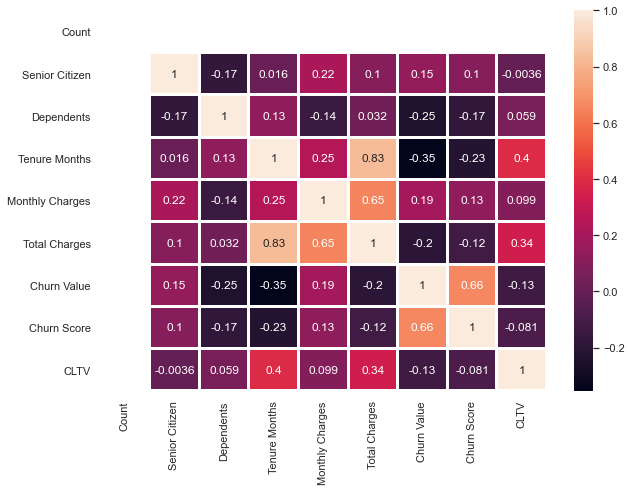

In [70]:
corr_data=pd.DataFrame(df2)
mask=np.zeros_like(corr_data)
plt.figure(figsize=(10,7))
sns.heatmap(corr_data.corr(),annot=True,linewidths=2)
#df_fic.corr()['Churn Value'].sort_values(ascending = False).plot(kind='bar')

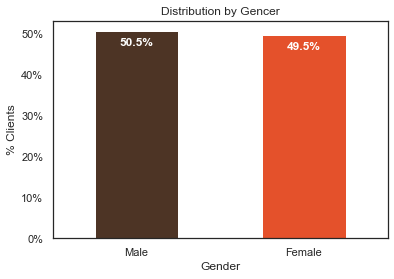

In [71]:
#Data analysis
#Gender Distribution
colors=['#4D3425','#E4512B']
ax=(df2['Gender'].value_counts()*100.0/len(df2)).plot(kind='bar',stacked=True,rot=0,color=colors)
ax.yaxis.set_major_formatter(mtick.PercentFormatter())
ax.set_ylabel("% Clients")
ax.set_xlabel("Gender")
ax.set_ylabel("% Clients")
ax.set_title("Distribution by Gencer")
totals=[]
for i in ax.patches:
    totals.append(i.get_width())
    total = sum(totals)
for i in ax.patches:
    ax.text(i.get_x()+.15,i.get_height()-3.5,str(round((i.get_height()/total),1))+'%',fontsize=12,color='white',weight = 'bold')

Text(0.5, 1.0, '% Senior Citizen')

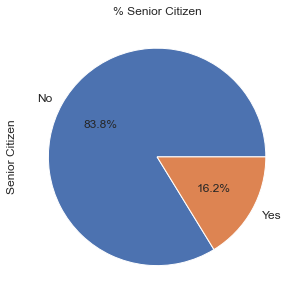

In [72]:
#Age Distribution
ax=(df3['Senior Citizen'].value_counts()*100.0/len(df3)).plot.pie(autopct='%.1f%%',labels=['No','Yes'],figsize=(5,5),fontsize=12)
ax.yaxis.set_major_formatter(mtick.PercentFormatter())
ax.set_ylabel('Senior Citizen',fontsize = 12)
ax.set_title('% Senior Citizen', fontsize = 12)


C:\Users\benne\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



Text(0.5, 1.0, 'Number of clients subscription duration')

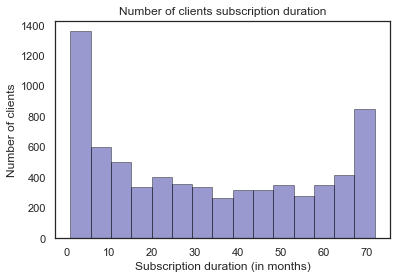

In [73]:
#Checking clients' subscription duration
ax= sns.distplot(df['Tenure Months'],hist=True,kde=False,color='darkblue',
hist_kws={'edgecolor':'black'},
kde_kws={'linewidth':6})
ax.set_ylabel('Number of clients')
ax.set_xlabel("Subscription duration (in months)")
ax.set_title("Number of clients subscription duration")

A big number of clients are new to the company (around 1400)

Text(0.5, 1.0, 'Nombre de clients by contract type')

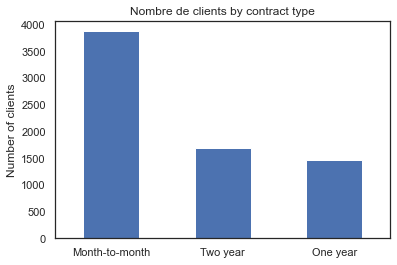

In [74]:
#Type of contract
ax = df['Contract'].value_counts().plot(kind = 'bar',rot = 0, width = 0.5)
ax.set_ylabel('Number of clients')
ax.set_title('Nombre de clients by contract type')

Most clients chose a mensual payment (month to month)

It could be exciting to check out a potential corrolation between the type of contract and its duration

Text(0.5, 1.0, 'Two year contract')

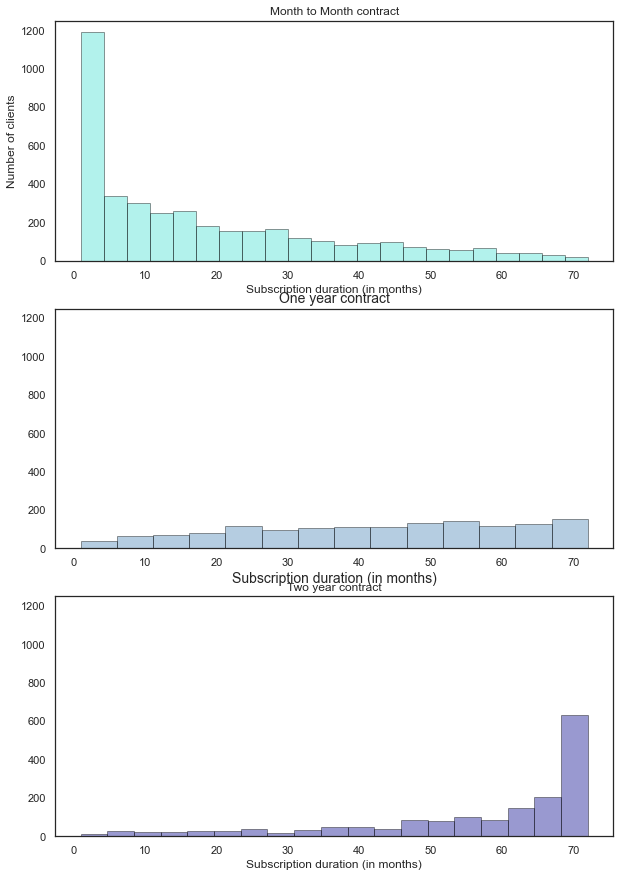

In [75]:
fig, (ax1,ax2,ax3) = plt.subplots(nrows=3, ncols=1, sharey = True, figsize =(10,15))
ax = sns.distplot(df[df['Contract']=='Month-to-month']['Tenure Months'],hist=True, kde=False,color = 'turquoise',hist_kws={'edgecolor':'black'},kde_kws={'linewidth': 4},ax=ax1)
ax.set_ylabel('Number of clients')
ax.set_xlabel("Subscription duration (in months)")
ax.set_title("Month to Month contract")
ax = sns.distplot(df[df['Contract']=='One year']['Tenure Months'],hist=True, kde=False,color = 'steelblue',hist_kws={'edgecolor':'black'},kde_kws={'linewidth': 4},ax=ax2)
ax.set_xlabel('Subscription duration (in months)',size = 14)
ax.set_title('One year contract',size = 14)
ax = sns.distplot(df[df['Contract']=='Two year']['Tenure Months'],hist=True, kde=False,color = 'darkblue',hist_kws={'edgecolor':'black'},kde_kws={'linewidth': 4},ax=ax3)
ax.set_xlabel("Subscription duration (in months)")
ax.set_title('Two year contract')


Most of the new customers are electing for a month to month contract.

They also are very susceptible of leaving/stop their subscription very early on.

In [76]:
#Lets check more information about the services 
df.columns.values

array(['CustomerID', 'Count', 'Country', 'State', 'City', 'Zip Code',
       'Lat Long', 'Latitude', 'Longitude', 'Gender', 'Senior Citizen',
       'Partner', 'Dependents', 'Tenure Months', 'Phone Service',
       'Multiple Lines', 'Internet Service', 'Online Security',
       'Online Backup', 'Device Protection', 'Tech Support',
       'Streaming TV', 'Streaming Movies', 'Contract',
       'Paperless Billing', 'Payment Method', 'Monthly Charges',
       'Total Charges', 'Churn Label', 'Churn Value', 'Churn Score',
       'CLTV', 'Churn Reason'], dtype=object)

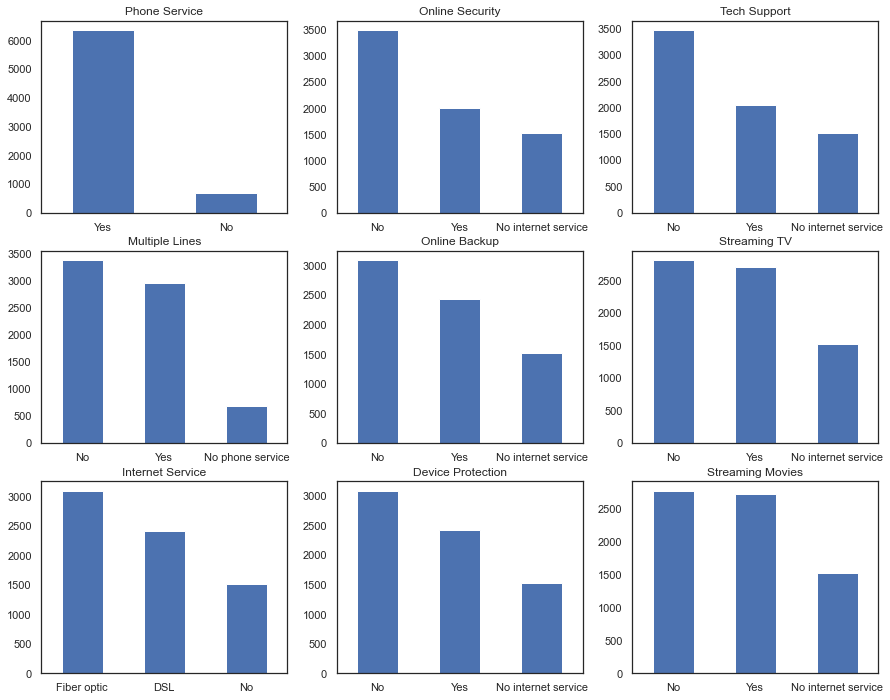

In [77]:
services = ['Phone Service','Multiple Lines', 'Internet Service', 'Online Security','Online Backup', 'Device Protection', 'Tech Support','Streaming TV', 'Streaming Movies']
fig,axes = plt.subplots(nrows=3,ncols=3,figsize=(15,12))
for i,item in enumerate(services):
    if i<3:
        ax=df[item].value_counts().plot(kind='bar',ax=axes[i,0],rot=0)
    elif i>=3 and i <6:
        ax = df[item].value_counts().plot(kind = 'bar',ax=axes[i-3,1],rot = 0)
    elif i<9:
        ax = df[item].value_counts().plot(kind = 'bar',ax=axes[i-6,2],rot = 0)
    ax.set_title(item)


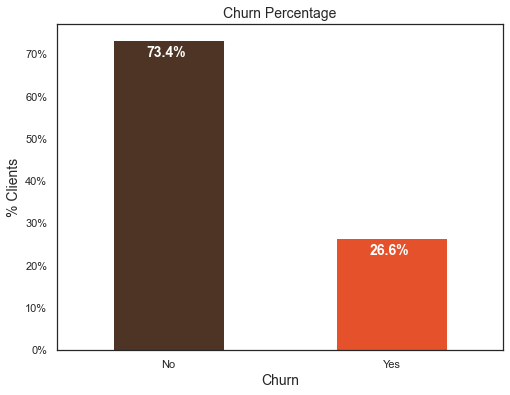

In [78]:
#Lets check Churn percentage.
colors = ['#4D3425','#E4512B']
ax = (df['Churn Label'].value_counts()*100.0/len(df)).plot(kind='bar',stacked = True,rot = 0,color = colors,figsize = (8,6))
ax.yaxis.set_major_formatter(mtick.PercentFormatter())
ax.set_ylabel('% Clients',size = 14)
ax.set_xlabel('Churn',size = 14)
ax.set_title('Churn Percentage', size = 14)
#On affiche le taux sur chaque barre de l'histogramme
totals = []
for i in ax.patches:
    totals.append(i.get_width())
total = sum(totals)
for i in ax.patches:ax.text(i.get_x()+.15, i.get_height()-4.0, str(round((i.get_height()/total), 1))+'%',fontsize=12,color='white',weight = 'bold',size = 14)


In [79]:
from sklearn.preprocessing import LabelEncoder
#encodage de l'etiquette
le = LabelEncoder()
tmp_churn = df[df['Churn Value'] == 1]
tmp_no_churn = df[df['Churn Value'] == 0]
bi_cs = df.nunique()[df.nunique() == 2].keys()
dat_rad = df[bi_cs]
for cols in bi_cs :
    tmp_churn[cols] = le.fit_transform(tmp_churn[cols])
data_frame_x = tmp_churn[bi_cs].sum().reset_index()
data_frame_x.columns = ["feature","yes"]
data_frame_x["no"] = tmp_churn.shape[0] - data_frame_x["yes"]
data_frame_x = data_frame_x[data_frame_x["feature"] != "Churn"]
#number of yes
trace1 = go.Scatterpolar(r = data_frame_x["yes"].values.tolist(),theta = data_frame_x["feature"].tolist(),fill = "toself",name = "Churn 1's",mode = "markers+lines", visible=True,marker = dict(size = 5))
trace2 = go.Scatterpolar(r = data_frame_x["no"].values.tolist(),theta = data_frame_x["feature"].tolist(),fill = "toself",name = "Churn 0's",mode = "markers+lines", visible=True,marker = dict(size = 5))
for cols in bi_cs :
    tmp_no_churn[cols] = le.fit_transform(tmp_no_churn[cols])
data_frame_x = tmp_no_churn[bi_cs].sum().reset_index()
data_frame_x.columns = ["feature","yes"]
data_frame_x["no"] = tmp_no_churn.shape[0] - data_frame_x["yes"]
data_frame_x = data_frame_x[data_frame_x["feature"] != "Churn"]
#number of yes
trace3 = go.Scatterpolar(r = data_frame_x["yes"].values.tolist(),theta = data_frame_x["feature"].tolist(),fill = "toself",name = "NoChurn 1's",mode = "markers+lines", visible=False,marker = dict(size = 5))
#numbr of no
trace4 = go.Scatterpolar(r = data_frame_x["no"].values.tolist(),theta = data_frame_x["feature"].tolist(),fill = "toself",name = "NoChurn 0's",mode = "markers+lines", visible=False,marker = dict(size = 5))
data = [trace1, trace2, trace3, trace4]
updatemenus = list([dict(active=0,x=-0.15,buttons=list([dict(label = 'Dist Désabonné',
                                                             method = 'update',
                                                             args = [{'visible': [True, True, False, False]},
                                                             {'title': "Repartition du nombre de Clients s'étant désabonné par service"}]),
                                                            dict(label = 'Dest Non-Désabonné',
                                                            method = 'update',
                                                            args = [{'visible': [False, False, True, True]},
                                                            {'title': "Repartition du nombre de Clients ne s'étant pas désabonné par service"}]),]),)])

layout = dict(title='ScatterPolar de désabonnement des Clients',showlegend=False,updatemenus=updatemenus)
fig = dict(data=data, layout=layout)
iplot(fig)


<ipython-input-79-79c753186037>:9: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

<ipython-input-79-79c753186037>:18: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



Text(0.5, 1.0, 'Distribution de désabonnement par charge Mensuel')

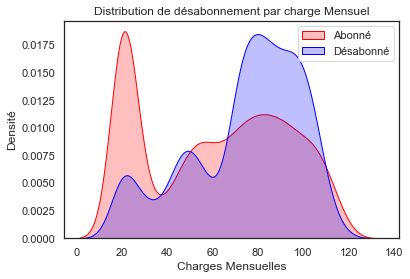

In [80]:
ax=sns.kdeplot(df['Monthly Charges'][(df['Churn Label']=='No')],
color='Red',shade=True)
ax=sns.kdeplot(df['Monthly Charges'][(df['Churn Label']=='Yes')],
color='Blue',shade=True)
ax.legend(["Abonné","Désabonné"],loc='upper right')
ax.set_ylabel('Densité')
ax.set_xlabel('Charges Mensuelles')
ax.set_title('Distribution de désabonnement par charge Mensuel')


Text(0.5, 1.0, 'Distribution de désabonnement par charge Mensuel')

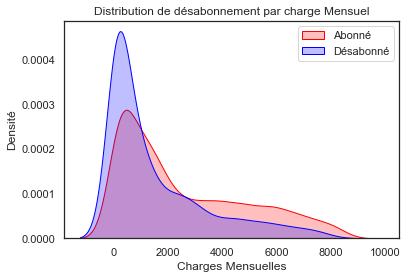

In [81]:
ax=sns.kdeplot(df['Total Charges'][(df['Churn Label']=='No')],
color='Red',shade=True)
ax=sns.kdeplot(df['Total Charges'][(df['Churn Label']=='Yes')],
color='Blue',shade=True)
ax.legend(["Abonné","Désabonné"],loc='upper right')
ax.set_ylabel('Densité')
ax.set_xlabel('Charges Mensuelles')
ax.set_title('Distribution de désabonnement par charge Mensuel')

In [82]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.feature_selection import SelectKBest,chi2
import seaborn as sns
import operator
from tabulate import tabulate

In [87]:
from sklearn.preprocessing import LabelEncoder,StandardScaler
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import train_test_split,learning_curve,GridSearchCV,cross_val_score
from sklearn.svm import SVC,LinearSVC
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.feature_selection import SelectKBest,f_classif
from sklearn.ensemble import RandomForestClassifier,GradientBoostingClassifier
from sklearn.tree import DecisionTreeClassifier
from IPython.display import display, HTML
from sklearn.naive_bayes import ComplementNB,GaussianNB,MultinomialNB,BernoulliNB,CategoricalNB
from sklearn.metrics import auc,confusion_matrix,precision_score,precision_recall_fscore_support,f1_score,consensus_score,recall_score,accuracy_score,plot_confusion_matrix,classification_report,precision_recall_curve,roc_auc_score,roc_curve
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier 


In [94]:
pd.set_option("Display.max_columns",100)
import warnings
warnings.filterwarnings('ignore')
df= pd.read_excel('C:/Users/benne/Downloads/Telco_customer_churn.csv.xlsx')
encodeur = LabelEncoder()
scaler=StandardScaler()
df["Total Charges"]=pd.to_numeric(df["Total Charges"],errors="coerce")
df["Total Charges"]=df["Total Charges"].astype(float)
df=df[df["Total Charges"].notna()]
print("il y a {} valeur nulle".format(df.iloc[:,:-1].isnull().sum().sum()) )


il y a 0 valeur nulle


In [112]:
# pour evaluer une liste d'algorithme
def evaluation(x_train,y_train,x_test,y_test,modelList={},confusion=False,roc_cu=True,learning_cu=False):
    areas={}
    models={}
    if len(modelList)!=0:
        if roc_cu:
            plt.figure(figsize=(12,8))
            plt.plot([0,1],[0,1],"r")
        for k,model in modelList.items():
            model.fit(x_train,y_train)
            models[k]=model
            if roc_cu:
                probs = model.predict_proba(x_test)[:,1]
                fpr , tpr , thresholds = roc_curve(y_test,probs)
                areas[k]=roc_auc_score(y_test,probs)
                plt.plot(fpr,tpr,"",label=k)
        if roc_cu:
            plt.legend()
            plt.show()
    areas = dict(sorted(areas.items(),key=operator.itemgetter(1),reverse=True))
    
    for k,area in areas.items():
        print(f"The Model's Area of {k} est {area}")
    if confusion:
        for k,model in models.items():
            plt.figure()
            y_pred = model.predict(x_test)
            print(f"Model: {k}")
            plot_confusion_matrix(model,x_test,y_test,display_labels=["No␣churn","Churn"])
            print(classification_report(y_test,y_pred,digits=6,target_names=["No␣churn","Churn"]))
            plt.show()
    
    if learning_cu:
        for k,model in models.items():
            N,train_score,val_score_train=learning_curve(model,x_train,y_train,cv=5,scoring="f1",train_sizes=np.linspace(0.1,1,10))
            #N,test_score,val_score_test=learning_curve(model,x_test,y_test,cv=5,scoring="f1",train_sizes=np.linspace(0.1,1,10))
            plt.figure(figsize=(12,8))
            plt.plot(N,train_score.mean(axis=1),label="Train score")
            plt.plot(N,val_score_train.mean(axis=1),label="validation score␣train")
            #plt.plot(N,test_score.mean(axis=1),label="Test score")
            #plt.plot(N,val_score_test.mean(axis=1),label="validation score␣test")
            plt.title(f"Model {k} ")
            plt.legend()
    return models

def featuresImportances(model,index,nb_features="None"):
    plt.figure(figsize=(14,5))
    serie=pd.Series(model.feature_importances_,index=index).sort_values(ascending=False)
    if nb_features=="None":
        serie.plot.bar(log=True)
    else:
        serie[:nb_features].plot.bar(log=True)
        
def final_model(model,X,seuil=0):
    return model.decision_function(X) > seuil

def comparaison_models(models,tests_set={}):
    arrays=[np.array([]),np.array([])]
    d=np.array([])
    for nom,model in models.items():
        arrays[0]=np.append(arrays[0],[nom,nom])
        arrays[1]=np.append(arrays[1],["No churn","Churn"])
    for name,model in models.items():
        x_test,y_test=tests_set.get(name)[0],tests_set.get(name)[1]
        y_pred = model.predict(x_test)
        res=precision_recall_fscore_support(y_test,y_pred)
        accuracy=accuracy_score(y_test,y_pred)
        res=list(res)
        res.insert(3,np.array([accuracy,accuracy]))
        res=tuple(res)
        d=np.append(d,np.array([val[0]for val in res]))
        d=np.append(d,np.array([val[1]for val in res]))
        
    d=d.reshape(len(models)*2,5)
    arrays=np.array(arrays)
    data=pd.DataFrame(d,columns=["precision","recall","f1_score","accuracy","test_size"])
    data.iloc[:,:-1]=data.iloc[:,:-1].apply(lambda x:x*100)
    data["Models"]=arrays[0,:]
    data["Etat"]=arrays[1,:]
    data=data.set_index(['Models'])
    print(tabulate(data, tablefmt='grid',headers="keys",showindex="always"))
    #data=data.set_index(['Modèles',"accuracy",'Etat'])
    #display(HTML(data.to_html()))

def precision_recall_f1(model):
    y_pred=model.predict(x_test)
    res=precision_recall_fscore_support(y_test,y_pred)
    data=pd.DataFrame(res,index=["precision","recall","f1_score","test_size"],columns=["No␣churn","Churn"])
    sns.heatmap(data.iloc[:-1,:].apply(lambda x:x*100),vmin=0,annot=True,fmt=".6g",vmax=100)
    



Naive Bayes Method

In [99]:
df1=df
df1['Gender'] = df1['Gender'].map({'Male': 1, 'Female': 0})
df1['Streaming Movies'] = df1['Streaming Movies'].map({'Yes': 1, 'No': 0, 'No␣internet service':0})
df1['Streaming TV'] = df1['Streaming TV'].map({'Yes': 1, 'No': 0, 'No internet␣service':0})
df1['Tech Support'] = df1['Tech Support'].map({'Yes': 1, 'No': 0, 'No internet␣service':0})
df1['Device Protection'] = df1['Device Protection'].map({'Yes': 1, 'No': 0, 'No␣internet service':0})
df1['Online Backup'] = df1['Online Backup'].map({'Yes': 1, 'No': 0, 'No␣internet service':0})
df1['Online Security'] = df1['Online Security'].map({'Yes': 1, 'No': 0, 'No␣internet service':0})
df1['Contract'] = df1['Contract'].map({'Month-to-month': 1, 'One year': 0, 'Two␣year':2})
df1['Internet Service'] = df1['Internet Service'].map({'Fiber optic': 1, 'No':0, 'DSL':2})
df1['Total Charges'] = pd.to_numeric(df1['Total Charges'],errors='coerce')
df1['Multiple Lines'] = df1['Multiple Lines'].map({'Yes': 1, 'No': 0, 'No phone␣service':0})
df1['Phone Service'] = df1['Phone Service'].map({'Yes': 1, 'No': 0, 'No phone␣service':0})
df1['Dependents'] = df1['Dependents'].map({'Yes': 1, 'No': 0, 'No internet␣service':0})
df1['Partner'] = df1['Partner'].map({'Yes': 1, 'No': 0, 'No internet service':0})
df1['Senior Citizen'] = df1['Senior Citizen'].map({'Yes': 1, 'No': 0, 'No␣internet service':0})
df1['Paperless Billing'] = df1['Paperless Billing'].map({'Yes': 1, 'No': 0, 'No␣internet service':0})
df1['Payment Method'] = df1['Payment Method'].map({'Mailed check': 1,'Electronic check': 0, 'Bank transfer (automatic)':2, 'Credit card␣(automatic)': 3})
df1=df1.drop(['CustomerID','Count','Country','State','City','Zip Code','Lat Long','Latitude','Longitude','Churn Label','Churn Reason'],axis=1)
df_fic=pd.get_dummies(df1) # To Transform variables to numeric

In [100]:
df_naives=df1
for col in df_naives.columns:
    df_naives[col] = encodeur.fit_transform(df_naives[col])
    #Separate inputs and outputs
    #X contains Data and Y the classes
y = df_naives['Churn Value'] #les résulats (classes)
X = df_naives.drop(['Churn Value'], axis =1) #les caractéristiques
X_trainN, X_testN, y_trainN, y_testN = train_test_split(X, y, test_size=0.2,random_state=0,stratify=y)


In [101]:
#This fction presents Naives Bayes Classifier's multiple methods : Gaussian Multinomial & Bernoulli.
#On va calculer le score de chaqu'une de ces méthodes .
nb = {'gaussian': GaussianNB(),
'bernoulli': BernoulliNB(),
'multinomial': MultinomialNB()}
scores = {}
for key, model in nb.items():
    s = cross_val_score(model, X_trainN, y_trainN, cv=5, scoring='accuracy')
    scores[key] = np.mean(s)
scores


{'gaussian': 0.9304888888888889,
 'bernoulli': 0.7585777777777778,
 'multinomial': 0.6789333333333334}

modele NaiveBayes
              precision    recall  f1-score   support

    No␣churn   0.982582  0.928364  0.954704      1033
       Churn   0.828306  0.954545  0.886957       374

    accuracy                       0.935323      1407
   macro avg   0.905444  0.941455  0.920830      1407
weighted avg   0.941573  0.935323  0.936696      1407



<Figure size 432x288 with 0 Axes>

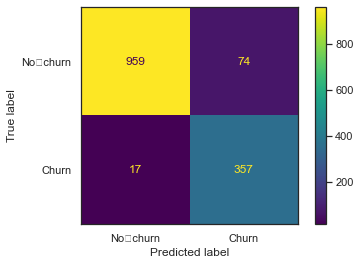

In [102]:
# modele à retenir celon celui qui a le meilleur score
modele = GaussianNB()
NaiveBayes=evaluation(X_trainN,y_trainN,X_testN,y_testN,modelList={"NaiveBayes":modele},confusion=True,roc_cu=False,learning_cu=False)


Logistic Regression

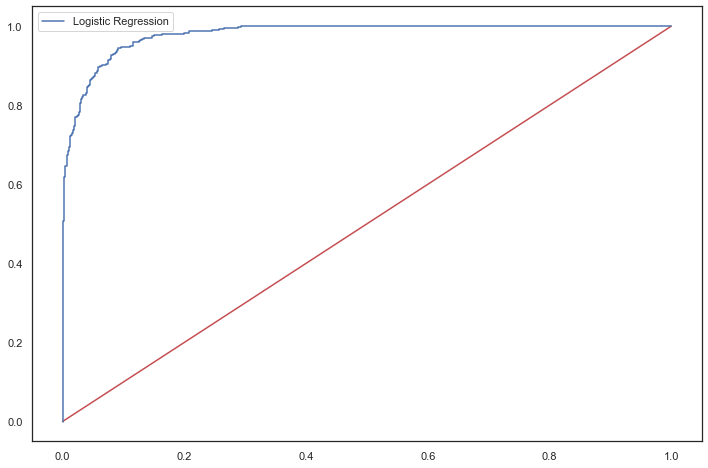

The Model's Area of Logistic Regression est 0.9795259122746167
Model: Logistic Regression
              precision    recall  f1-score   support

    No␣churn   0.942912  0.959342  0.951056      1033
       Churn   0.882022  0.839572  0.860274       374

    accuracy                       0.927505      1407
   macro avg   0.912467  0.899457  0.905665      1407
weighted avg   0.926726  0.927505  0.926925      1407



<Figure size 432x288 with 0 Axes>

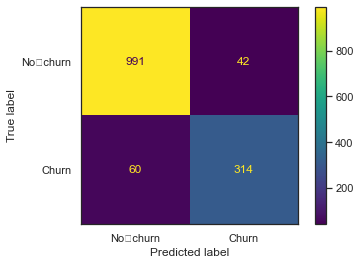

In [113]:
X = df1.drop("Churn Value", axis=1)
y = df1["Churn Value"]
X_trainL, X_testL, y_trainL, y_testL = train_test_split(X, y, test_size=0.2,random_state=0,stratify=y)
X_trainL = scaler.fit_transform(X_trainL)
X_testL = scaler.transform(X_testL)
logreg = LogisticRegression(random_state=0)
regressionL=evaluation(X_trainL,y_trainL,X_testL,y_testL,modelList={"Logistic Regression":logreg},confusion=True,roc_cu=True,learning_cu=False)


In [114]:
param = {'penalty': ['l1', 'l2', 'elasticnet', 'none'],
'C' : np.linspace(0,10, 100),
'solver': ['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga'],
'max_iter': [100,1000, 2000, 3000]}
log = LogisticRegression(random_state=0)
grid = GridSearchCV(log, param_grid=param, cv =5, n_jobs=-1)
#grid.fit(X_train, y_train)
#grid.best_params_

Model: Logistic Regression
              precision    recall  f1-score   support

    No␣churn   0.946411  0.957406  0.951877      1033
       Churn   0.878453  0.850267  0.864130       374

    accuracy                       0.928927      1407
   macro avg   0.912432  0.903836  0.908004      1407
weighted avg   0.928347  0.928927  0.928553      1407



<Figure size 432x288 with 0 Axes>

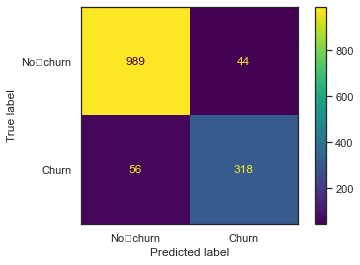

In [115]:
final_modelL = LogisticRegression(random_state=0, C=0.20202, penalty = 'l2',solver='liblinear', tol=0.2)
regressionL=evaluation(X_trainL,y_trainL,X_testL,y_testL,modelList={"Logistic Regression":final_modelL},confusion=True,roc_cu=False,learning_cu=False)

RANDOM FOREST CLASSIFIER


In [118]:
# Drop useless columns
dfR = df.drop(['Count','Country','State','CustomerID','Lat Long','Churn Label'],axis=1)
#One Hot Encoing using get_dummies method
dfR = pd.get_dummies(dfR, columns = ['Contract','Dependents','Device Protection','Gender',
'Internet Service','Multiple Lines','Online Backup',
'Online Security','Paperless Billing','Partner',
'Payment Method','Phone Service','Senior Citizen',
'Streaming Movies','Streaming TV','Tech Support','City','Churn Reason'])

Model: Random Forest
              precision    recall  f1-score   support

    No␣churn   0.996135  0.998064  0.997099      1033
       Churn   0.994624  0.989305  0.991957       374

    accuracy                       0.995736      1407
   macro avg   0.995379  0.993684  0.994528      1407
weighted avg   0.995733  0.995736  0.995732      1407



<Figure size 432x288 with 0 Axes>

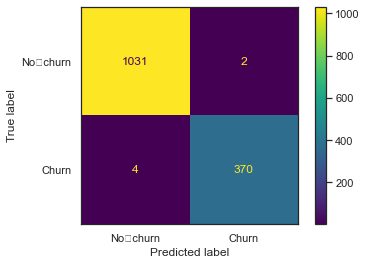

In [119]:
#Create Feature variable X and target variable y
y = dfR['Churn Value']
X = dfR.drop(['Churn Value'], axis =1)
X_trainR, X_testR,y_trainR,y_testR = train_test_split(X, y, test_size = 0.20,random_state = 0,stratify = y)
rfmodel = RandomForestClassifier(n_estimators=100 ,criterion='gini',random_state=0) # par defaut au prémier lieux
#Parameters choice
randomF=evaluation(X_trainR,y_trainR,X_testR,y_testR,modelList={"Random Forest":rfmodel},confusion=True,roc_cu=False,learning_cu=False)

Gradient Boosting

In [184]:
df= pd.read_excel("C:/Users/benne/Downloads/Telco_customer_churn.csv.xlsx")
df["Total Charges"]=pd.to_numeric(df["Total Charges"],errors="coerce")
df["Total Charges"]=df["Total Charges"].astype(float)
df=df[df["Total Charges"].notna()]


In [185]:
#service_cols=["Phone Service","Multiple Lines","Internet Service","Online␣Security","Online Backup","Device Protection","Tech Support","Streaming␣TV","Streaming Movies","Paperless Billing"]
service_cols=['Phone Service', 'Internet Service', 'Online Security','Online Backup', 'Device Protection', 'Tech Support','Streaming TV', 'Streaming Movies']
execptions=["Gender", "Senior Citizen", "Partner", "Dependents", "Phone Service" ,"Paperless Billing", "Churn Label","Churn Score", "Engaged", "ElectCheck", "fiberopt", "NoProt"]
df.loc[:,'Engaged'] = np.where(df['Contract'] != 'Month-to-month', 1,0) #␣client with a month to month contract
df.loc[:,'YandNotE'] = np.where((df['Senior Citizen']==0) & (df['Engaged']==0),1,0) # si client est jeune et n'a pas souscrit a un abonnement month-to-month
df.loc[:,'ElectCheck'] = np.where((df['Payment Method'] == 'Electronic check')& (df['Engaged']==0), 1,0) #si le client a paye par chèque electronique et␣n'a pas souscrit à un payement mensuel
df.loc[:,'fiberopt'] = np.where((df['Internet Service'] != 'Fiber optic'), 1,0)# si le client utilise internet par fibre optique
df.loc[:,'NoProt'] = np.where((df['Online Backup'] != 'No') | (df['Device Protection'] != 'No') | (df['Tech Support'] != 'No'), 1,0) # si le client␣n'utilise pas au moins un service supplémentaire au service internet
df['nb_subscriptions'] = (df[service_cols]== 'Yes').sum(axis=1) # le nombre de␣service auxquels le client a souscrit
target_col=["Churn Label"]
cat_col=[]
binary_col=[]
multi_cat_col=[]
delete_col=["Churn Value","Count","Zip Code",'City','Zip Code','Lat Long','Latitude','Longitude',"CustomerID","Churn Reason"]
cat_col=df.nunique()[df.nunique() < 10].keys().tolist()
cat_col=[x for x in cat_col if x not in delete_col]
binary_col = df.nunique()[df.nunique() == 2].keys().tolist()
multi_cat_col=[x for x in cat_col if x not in binary_col]

In [186]:
print(delete_col)
df=df.drop(delete_col,axis=1,errors="ignore")

['Churn Value', 'Count', 'Zip Code', 'City', 'Zip Code', 'Lat Long', 'Latitude', 'Longitude', 'CustomerID', 'Churn Reason']


In [187]:
df=pd.get_dummies(data=df,columns=multi_cat_col)

In [188]:
#col_to_standardScale=[col for col in features.columns if col not in execptions]
#col_to_encode=[col for col in binary_col if col not in delete_col]
encoder = LabelEncoder()
for col in binary_col:
    if col not in delete_col:
        df[col]=encoder.fit_transform(df[col])

In [189]:
features=df.drop(target_col,axis=1)
target=df[target_col].values.reshape(features.shape[0])

SelectKBest

<AxesSubplot:>

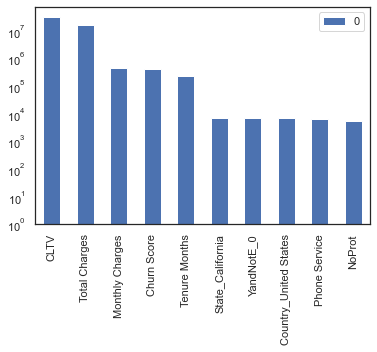

In [190]:
selector=SelectKBest(score_func=chi2,k=features.shape[1])
fit=selector.fit_transform(features,target)
dd=pd.DataFrame(fit.sum(axis=0))
dd.index =features.columns
dd.sort_values(dd.columns[0],ascending=False).iloc[:10].plot.bar(log=True)

In [192]:
cols=[col for col in features.columns if col not in execptions]
print(cols)
scaler=StandardScaler()
data=scaler.fit_transform(df[cols])
right=pd.DataFrame(data,columns=cols)
left=pd.DataFrame(df[execptions],columns=execptions)
data=left.merge(right, left_index=True, right_index=True,how="left")

['Tenure Months', 'Monthly Charges', 'Total Charges', 'CLTV', 'Country_United States', 'State_California', 'Multiple Lines_No', 'Multiple Lines_No phone service', 'Multiple Lines_Yes', 'Internet Service_DSL', 'Internet Service_Fiber optic', 'Internet Service_No', 'Online Security_No', 'Online Security_No internet service', 'Online Security_Yes', 'Online Backup_No', 'Online Backup_No internet service', 'Online Backup_Yes', 'Device Protection_No', 'Device Protection_No internet service', 'Device Protection_Yes', 'Tech Support_No', 'Tech Support_No internet service', 'Tech Support_Yes', 'Streaming TV_No', 'Streaming TV_No internet service', 'Streaming TV_Yes', 'Streaming Movies_No', 'Streaming Movies_No internet service', 'Streaming Movies_Yes', 'Contract_Month-to-month', 'Contract_One year', 'Contract_Two year', 'Payment Method_Bank transfer (automatic)', 'Payment Method_Credit card (automatic)', 'Payment Method_Electronic check', 'Payment Method_Mailed check', 'YandNotE_0', 'nb_subscrip

Normalisation

In [193]:
cols=[col for col in features.columns if col not in execptions]
scaler=StandardScaler()
data=scaler.fit_transform(df[cols])
right=pd.DataFrame(data,columns=cols)
left=pd.DataFrame(df[execptions],columns=execptions)
data=left.merge(right, left_index=True, right_index=True,how="left")

In [194]:
data.dropna(axis=0,inplace=True)
features=data.drop(target_col,axis=1)
target=data[target_col].values.reshape(features.shape[0])

In [195]:
x_train,x_test,y_train,y_test=train_test_split(features,target,test_size=0.2,random_state=0,stratify=target)


Comparing models with base parameters

In [196]:
xgb = XGBClassifier()
gboost=GradientBoostingClassifier()
lgbm=LGBMClassifier()

[16:00:12] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


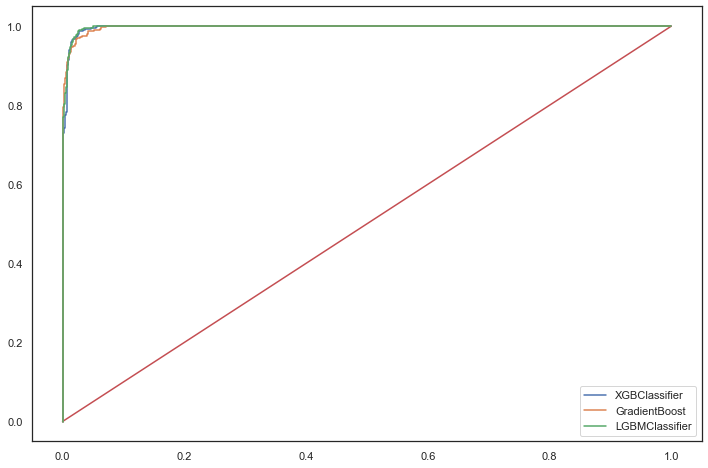

The Model's Area of LGBMClassifier est 0.9975025545003293
The Model's Area of GradientBoost est 0.9970720498762948
The Model's Area of XGBClassifier est 0.9970616762708964
Model: XGBClassifier
              precision    recall  f1-score   support

    No␣churn   0.979749  0.985451  0.982592      1031
       Churn   0.959239  0.943850  0.951482       374

    accuracy                       0.974377      1405
   macro avg   0.969494  0.964651  0.967037      1405
weighted avg   0.974290  0.974377  0.974311      1405



<Figure size 432x288 with 0 Axes>

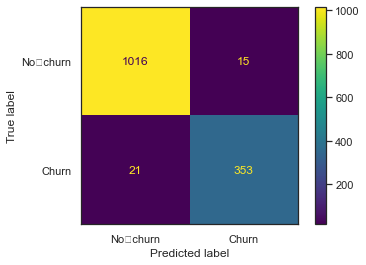

Model: GradientBoost
              precision    recall  f1-score   support

    No␣churn   0.977885  0.986421  0.982134      1031
       Churn   0.961644  0.938503  0.949932       374

    accuracy                       0.973665      1405
   macro avg   0.969764  0.962462  0.966033      1405
weighted avg   0.973561  0.973665  0.973562      1405



<Figure size 432x288 with 0 Axes>

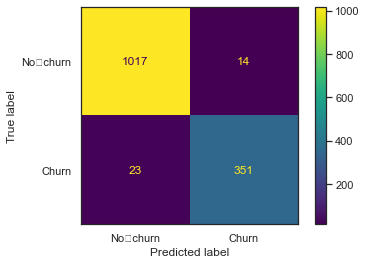

Model: LGBMClassifier
              precision    recall  f1-score   support

    No␣churn   0.982592  0.985451  0.984019      1031
       Churn   0.959569  0.951872  0.955705       374

    accuracy                       0.976512      1405
   macro avg   0.971080  0.968661  0.969862      1405
weighted avg   0.976463  0.976512  0.976482      1405



<Figure size 432x288 with 0 Axes>

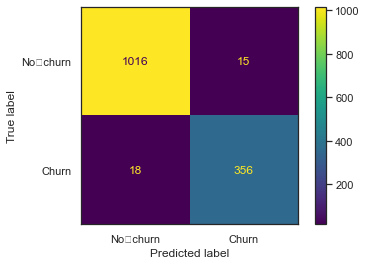

[16:00:16] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[16:00:16] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[16:00:17] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[16:00:17] WARNING: C:/Users/Administrator/workspace/xgboost-win64_rel

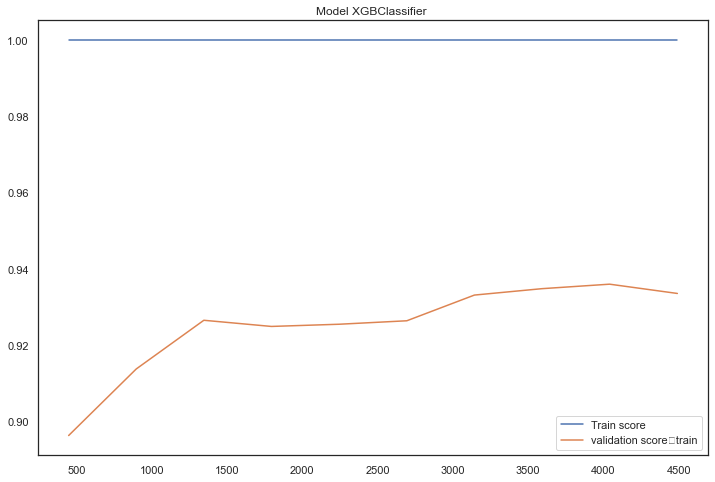

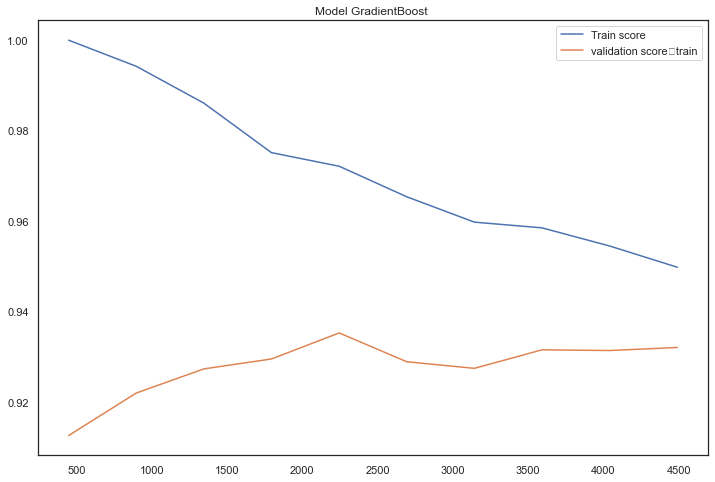

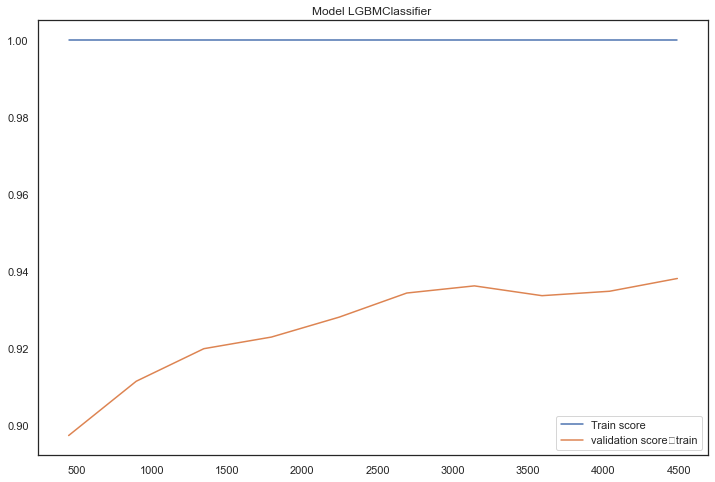

In [197]:
modelList={"XGBClassifier":xgb,"GradientBoost":gboost,"LGBMClassifier":lgbm}
modelsBase=evaluation(x_train,y_train,x_test,y_test,modelList,True,learning_cu=True)

Example of hyperparameters (GradientBoostingClassifier)

In [198]:
paramsGB1={"n_estimators":range(290,321,10)}
model=GradientBoostingClassifier(learning_rate=0.2,min_samples_split=35,min_samples_leaf=3,max_depth=8,max_features='sqrt',subsample=0.8,random_state=0)
grid1=GridSearchCV(model, param_grid = paramsGB1, scoring='recall',n_jobs=4,cv=5)
grid1.fit(x_train,y_train)
print( grid1.best_params_, grid1.best_score_)


{'n_estimators': 320} 0.937123745819398


In [199]:
paramsGB1={"max_depth":range(3,6,1),'min_samples_split':range(420,451,10)}
model=GradientBoostingClassifier(learning_rate=0.2,n_estimators=310,min_samples_split=35,min_samples_leaf=3,max_features='sqrt',subsample=0.8,random_state=0)
grid1=GridSearchCV(model, param_grid = paramsGB1, scoring='recall',n_jobs=4,cv=5)
grid1.fit(x_train,y_train)
print( grid1.best_params_, grid1.best_score_)


{'max_depth': 3, 'min_samples_split': 430} 0.9411371237458195


In [200]:
paramsGB1={'min_samples_leaf':range(29,40,1),'max_features':range(7,12,2)}
model=GradientBoostingClassifier(learning_rate=0.2,n_estimators=310,min_samples_split=430,max_features='sqrt',subsample=0.8,random_state=0)
grid1=GridSearchCV(model, param_grid = paramsGB1, scoring='recall',n_jobs=4,cv=5)
grid1.fit(x_train,y_train)
print( grid1.best_params_, grid1.best_score_)

{'max_features': 9, 'min_samples_leaf': 34} 0.9444816053511706


In [204]:
modelLGBM = LGBMClassifier(num_leaves=17,max_depth=10,learning_rate=0.1,n_estimators=32,subsample_for_bin=200000,min_split_gain=0.0,min_child_weight=0.001,min_child_samples=1,subsample=0.6,subsample_freq=0,colsample_bytree=1.0,reg_alpha=1e-08,reg_lambda=1e-08,random_state=0)
modelGB = GradientBoostingClassifier(learning_rate=0.2,n_estimators=310,max_depth=5,min_samples_split=430,min_samples_leaf=32,max_features=7,random_state=0)
modelRF =RandomForestClassifier(n_estimators=190,max_depth=7,min_samples_split=29,max_leaf_nodes=30,min_samples_leaf=1,max_samples=0.7,max_features=19,random_state=0)
modelXGB = XGBClassifier(n_estimators=250,learning_rate=0.1,max_depth=5,min_child_weight=0.001,gamma = 0.3,subsample=1,colsample_bytree = 0.83,reg_alpha=1e-5,scale_pos_weight=600)

Comparing the models when they are enhanced


[16:06:32] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


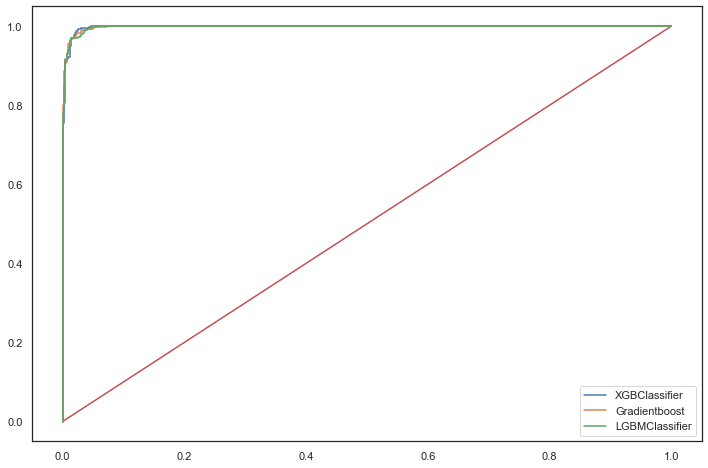

The Model's Area of LGBMClassifier est 0.9978967515054695
The Model's Area of XGBClassifier est 0.9978760042946726
The Model's Area of Gradientboost est 0.9978293230703796
Model: XGBClassifier
              precision    recall  f1-score   support

    No␣churn   0.997986  0.961203  0.979249      1031
       Churn   0.902913  0.994652  0.946565       374

    accuracy                       0.970107      1405
   macro avg   0.950449  0.977928  0.962907      1405
weighted avg   0.972678  0.970107  0.970549      1405



<Figure size 432x288 with 0 Axes>

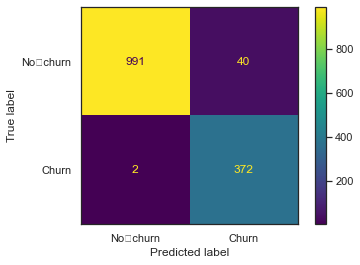

Model: Gradientboost
              precision    recall  f1-score   support

    No␣churn   0.984541  0.988361  0.986447      1031
       Churn   0.967568  0.957219  0.962366       374

    accuracy                       0.980071      1405
   macro avg   0.976054  0.972790  0.974406      1405
weighted avg   0.980023  0.980071  0.980037      1405



<Figure size 432x288 with 0 Axes>

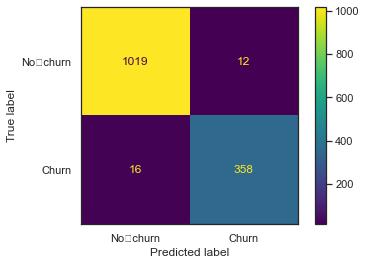

Model: LGBMClassifier
              precision    recall  f1-score   support

    No␣churn   0.983591  0.988361  0.985970      1031
       Churn   0.967480  0.954545  0.960969       374

    accuracy                       0.979359      1405
   macro avg   0.975535  0.971453  0.973470      1405
weighted avg   0.979302  0.979359  0.979315      1405



<Figure size 432x288 with 0 Axes>

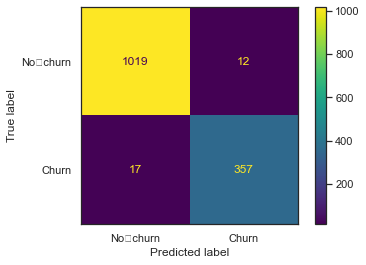

[16:06:38] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[16:06:38] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[16:06:39] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[16:06:40] WARNING: C:/Users/Administrator/workspace/xgboost-win64_rel

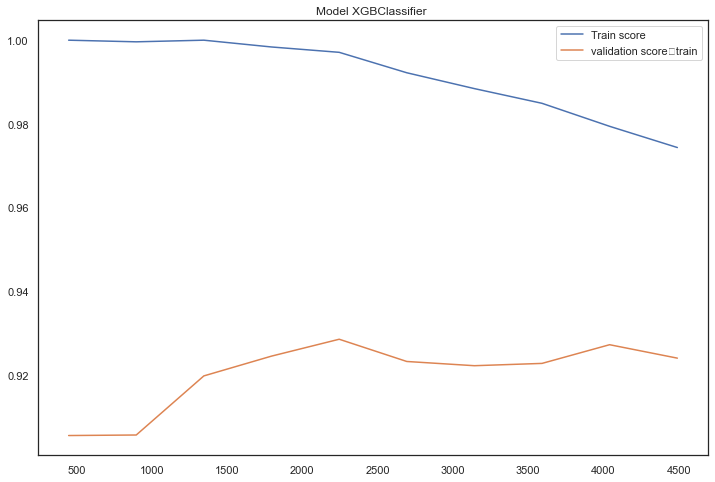

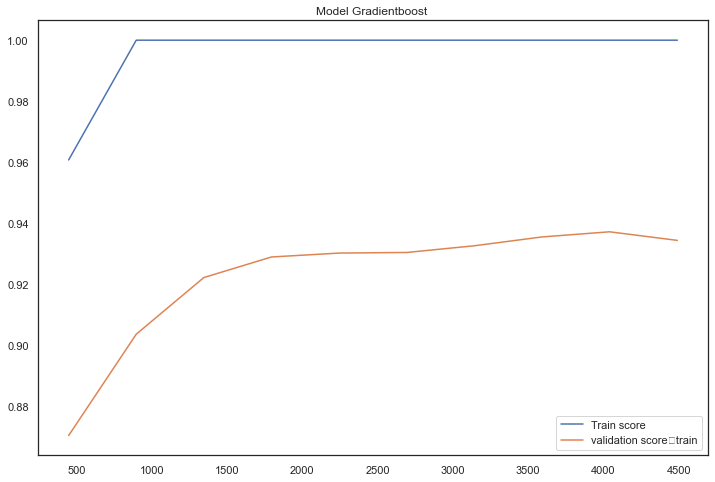

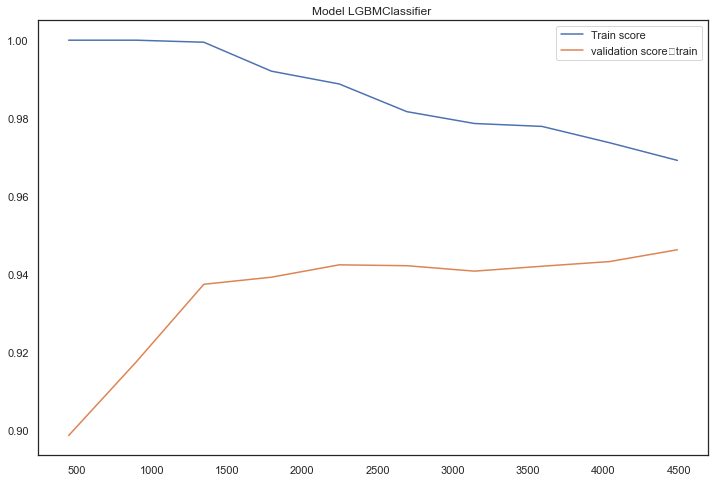

In [205]:
modelList={"XGBClassifier":modelXGB,"Gradientboost":modelGB,"LGBMClassifier":modelLGBM}
models=evaluation(x_train,y_train,x_test,y_test,modelList,True,learning_cu=True)

In [206]:
best_model=models["LGBMClassifier"]


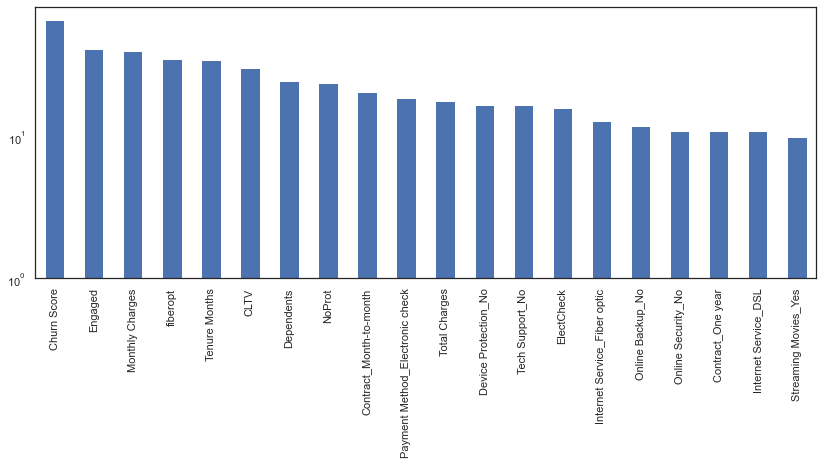

In [207]:
featuresImportances(best_model,features.columns,20)


Final Results: The best 2 Models are LGBMClassifier & GradientBoostingClassifier

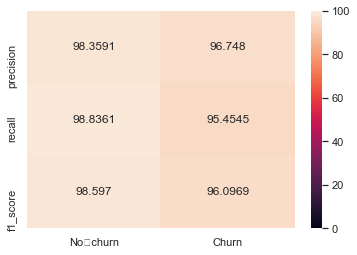

In [208]:
precision_recall_f1(best_model)


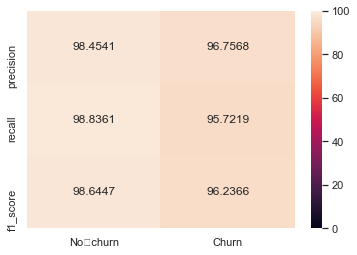

In [209]:
precision_recall_f1(models["Gradientboost"])

Comparing Models 

In [211]:
models["Logistic Regression"]=regressionL["Logistic Regression"]
models["RamdomForest"]=randomF["Random Forest"]
models["NaiveBayes"]=NaiveBayes["NaiveBayes"]
models


{'XGBClassifier': XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
               colsample_bynode=1, colsample_bytree=0.83, gamma=0.3, gpu_id=-1,
               importance_type='gain', interaction_constraints='',
               learning_rate=0.1, max_delta_step=0, max_depth=5,
               min_child_weight=0.001, missing=nan, monotone_constraints='()',
               n_estimators=250, n_jobs=4, num_parallel_tree=1, random_state=0,
               reg_alpha=1e-05, reg_lambda=1, scale_pos_weight=600, subsample=1,
               tree_method='exact', validate_parameters=1, verbosity=None),
 'Gradientboost': GradientBoostingClassifier(learning_rate=0.2, max_depth=5, max_features=7,
                            min_samples_leaf=32, min_samples_split=430,
                            n_estimators=310, random_state=0),
 'LGBMClassifier': LGBMClassifier(max_depth=10, min_child_samples=1, n_estimators=32,
                num_leaves=17, random_state=0, reg_alpha=1e-08, reg_lam

In [213]:
test_set={
"XGBClassifier":[x_test,y_test],
"Gradientboost":[x_test,y_test],
"LGBMClassifier":[x_test,y_test],
"Logistic Regression":[X_testL,y_testL],
"RamdomForest":[X_testR,y_testR],
"NaiveBayes":[X_testN,y_testN],
}
comparaison_models(models,test_set)


+---------------------+-------------+----------+------------+------------+-------------+----------+
| Models              |   precision |   recall |   f1_score |   accuracy |   test_size | Etat     |
+=====================+=============+==========+============+============+=============+==========+
| XGBClassifier       |     99.7986 |  96.1203 |    97.9249 |    97.0107 |        1031 | No churn |
+---------------------+-------------+----------+------------+------------+-------------+----------+
| XGBClassifier       |     90.2913 |  99.4652 |    94.6565 |    97.0107 |         374 | Churn    |
+---------------------+-------------+----------+------------+------------+-------------+----------+
| Gradientboost       |     98.4541 |  98.8361 |    98.6447 |    98.0071 |        1031 | No churn |
+---------------------+-------------+----------+------------+------------+-------------+----------+
| Gradientboost       |     96.7568 |  95.7219 |    96.2366 |    98.0071 |         374 | Churn    |
